# Module 2 - Filtering

In [1]:
import matplotlib.pyplot as plt
import imageio as img
import numpy as np
import scipy as sp
import skimage as ski #for different image analysis algorithms
import skimage.filters
import seaborn as sns; sns.set_style('white'); sns.set_context('notebook')

In [2]:
figfile = 'Processed/' #folder for saving images

Import image as `pic` using function `imread`

In [3]:
pic = np.array(img.imread('Images/kiran1.tif')).astype('int')

## 2.1 Convolution and Filtering

In [4]:
sq = np.ones([3,3]).astype('int')
smoothed = sp.ndimage.convolve(pic,sq,cval = 0, mode = 'constant')

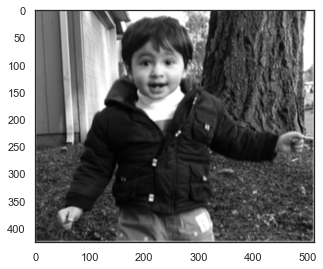

In [5]:
plt.figure(figsize = (5,5))
plt.imshow(smoothed, cmap = 'gray');
plt.savefig(figfile+'smoothed_kiran.tif',dpi = 300)

In [6]:
print(smoothed[3,3])

1079


In [7]:
print(pic[2,3]+pic[4,3]+pic[3,2]+pic[3,4]+pic[3,3]+pic[2,4]+pic[4,4]+pic[2,2]+pic[4,2])
print(pic[3,3])

1079
123


Convolving with a 3x3 matrix of ones implies that every pixel is replaces with a sum of its 8 neighbours and itself.

## 2.2 Gaussian Filter

In [8]:
stdev = 1
gaus = ski.filters.gaussian(pic,stdev)

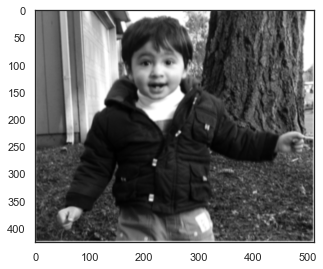

In [9]:
plt.figure(figsize = (5,5))
plt.imshow(gaus, cmap = 'gray');
plt.savefig(figfile+'gaussian_kiran.tif',dpi = 300)

A gaussian filter smooths the image and removes edges. The value of `stddev` determines how blurry the image will be.

## 2.3 Median Filter

In [10]:
med = ski.filters.median(pic)

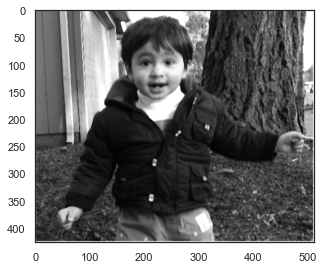

In [11]:
plt.figure(figsize = (5,5))
plt.imshow(med, cmap = 'gray');
plt.savefig(figfile+'median_kiran.tif',dpi = 300)

Retains edges better than the Gaussian Filter.

## 2.4 Filtering and Thresholding

Applying gaussian and median filters.

In [12]:
pic2 = np.array(img.imread('Images/MakeUp_RichardPrince_1983_gray.png'))
gaus2 = ski.filters.gaussian(pic2,1)
med2 = ski.filters.median(pic2)

Defining the thresholder function.

In [13]:
def g_thresh(pic, threshold):
    thresh = np.where(pic < threshold, 0, 1) #binarizes the image
    return thresh

Thresholding filtered images with Otsu's method and plotting.

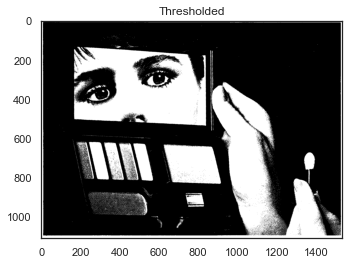

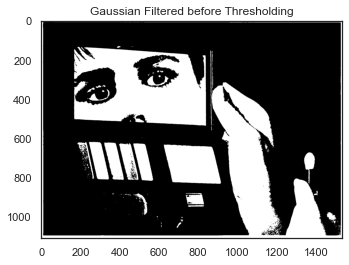

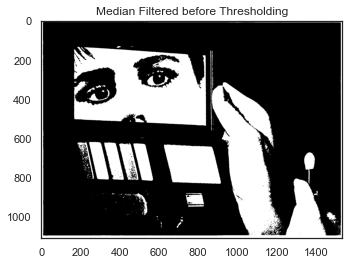

In [14]:
threshold = ski.filters.threshold_otsu(pic2)
thresh_pic = g_thresh(pic2,threshold)

threshold_g = ski.filters.threshold_otsu(gaus2)
thresh_pic_g = g_thresh(gaus2,threshold_g)

threshold_m = ski.filters.threshold_otsu(med2)
thresh_pic_m = g_thresh(med2,threshold_m)

plt.imshow(thresh_pic, cmap = 'gray'); plt.title('Thresholded')
plt.savefig(figfile+'Thresholded.png',dpi=300); plt.show()
plt.imshow(thresh_pic_g, cmap = 'gray'); plt.title('Gaussian Filtered before Thresholding')
plt.savefig(figfile+'Gaussian_Filtered_before_Thresholding.png',dpi=300); plt.show()
plt.imshow(thresh_pic_m, cmap = 'gray'); plt.title('Median Filtered before Thresholding')
plt.savefig(figfile+'Median_Filtered_before_Thresholding.png',dpi=300); plt.show()

Notice how filtering before thresholding removes the smudges and shades from the final image.

## 2.4 Smudge Removal
### High Pass Filtering

In [15]:
gray = lambda rgb : np.dot(rgb[... , :3] , [0.2125 , 0.7154, 0.0721]) #colour conversion function

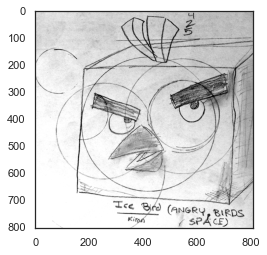

In [16]:
angry = gray(np.array(img.imread('Images/k_icebird_circles_28Mar2014.png')))
plt.imshow(angry, cmap = 'gray'); plt.show()

1\. Invert image.

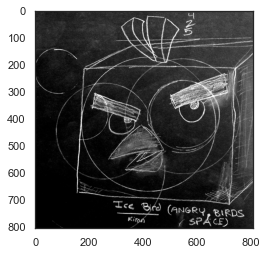

In [17]:
r_angry = 255-angry #invert
plt.imshow(r_angry, cmap = 'gray'); plt.show()

2\. Apply gaussian filtering. 

In [18]:
angry_gauss = ski.filters.gaussian(r_angry,5)

3\. Subtract filtered image from original.

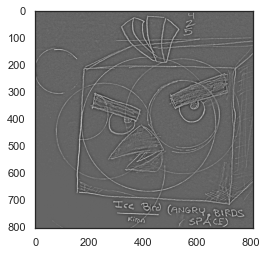

In [19]:
sub_angry = r_angry.astype('double')-angry_gauss.astype('double')
plt.imshow(sub_angry, cmap = 'gray'); plt.show()

4\. Invert back.

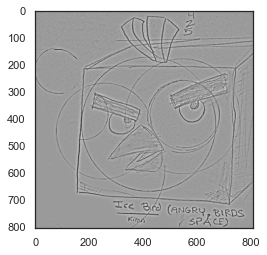

In [20]:
r_sub_angry = 255-sub_angry
plt.imshow(r_sub_angry, cmap = 'gray')
plt.savefig(figfile+'subtracted_image',dpi = 300);  plt.show()

5\. Threshold image.

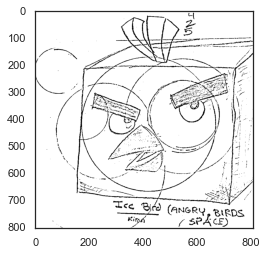

In [21]:
adaptive_thresh = ski.filters.threshold_local(r_sub_angry, block_size=35, offset=35)
threshed = g_thresh(r_sub_angry, adaptive_thresh)
plt.imshow(threshed, cmap = 'gray')
plt.savefig(figfile+'k_icebird_circles_28Mar2014_smudge_removed.png', dpi = 300); plt.show()

Note that if we don't invert the image before subtracting, we end up with negative pixel values. while `threshold_local` and `imshow` can deal with negative values, it is inconvenient to have an image with negative pixel values if we want to perform other compuations.